# Home Credit Default Risk


this project is to predict how capable each applicant is of repaying a loan from the Kaggle website [Home Credit Default Risk
](https://www.kaggle.com/c/home-credit-default-risk/overview)


In [ ]:
# import library 
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import isnan
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.model_selection import  train_test_split

from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import accuracy_score

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [69]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [70]:
# Load data
train= pd.read_csv('~/Desktop/project/creditRisk/data/application_train.csv')
test= pd.read_csv('~/Desktop/project/creditRisk/data/application_test.csv')


In [71]:
print('shape train data',train.shape)
print('shape test data',test.shape)

shape train data (307511, 122)
shape test data (48744, 121)


# dealing with missing data

first, we will drop the columns that contains more than 50% nan values and before w drop them we will check if these features are correlated with the target does missing values have meaning

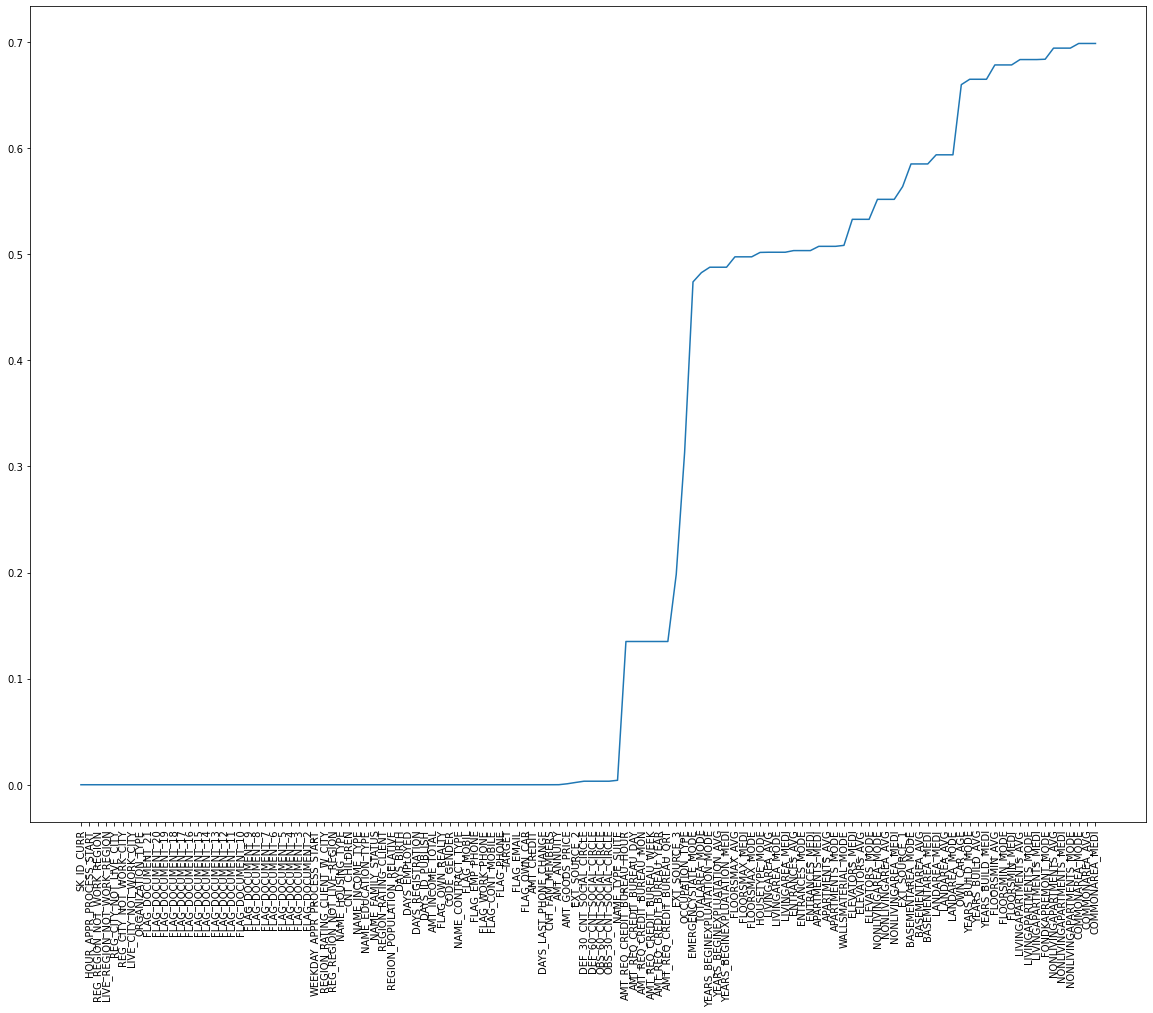

In [72]:
missing_value_train = train.isnull().mean()
plt.subplots(figsize=(20,15))
plt.xticks(rotation=90)
plt.plot(missing_value_train.sort_values() )


In [73]:
df_train=train.drop(['TARGET'],axis=1)
df_test =test.copy()

In [74]:
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:

# filling the nan for df_tain set
missing_value_train = df_train.isnull().mean()

for col in list(missing_value_train.index):
    if missing_value_train[col]<0.5:
        if df_train[col].dtype == 'object':
            df_train[col].fillna(df_train[col].value_counts().index[0], inplace=True)
        else:
            df_train[col].fillna(df_train[col].mean(), inplace=True)
    else:
        if df_train[col].dtype == 'object':
            df_train[col].fillna('missing', inplace=True)
    
# filling the nan for df_test set
missing_value_test = test.isnull().mean()

for col in list(missing_value_train.index):
    if missing_value_train[col]<0.5:
        if df_test[col].dtype == 'object':
            df_test[col].fillna(df_test[col].value_counts().index[0], inplace=True)
        else:
            df_test[col].fillna(df_test[col].mean(), inplace=True)
    else:
        if df_test[col].dtype == 'object':
            df_test[col].fillna('missing', inplace=True)
    



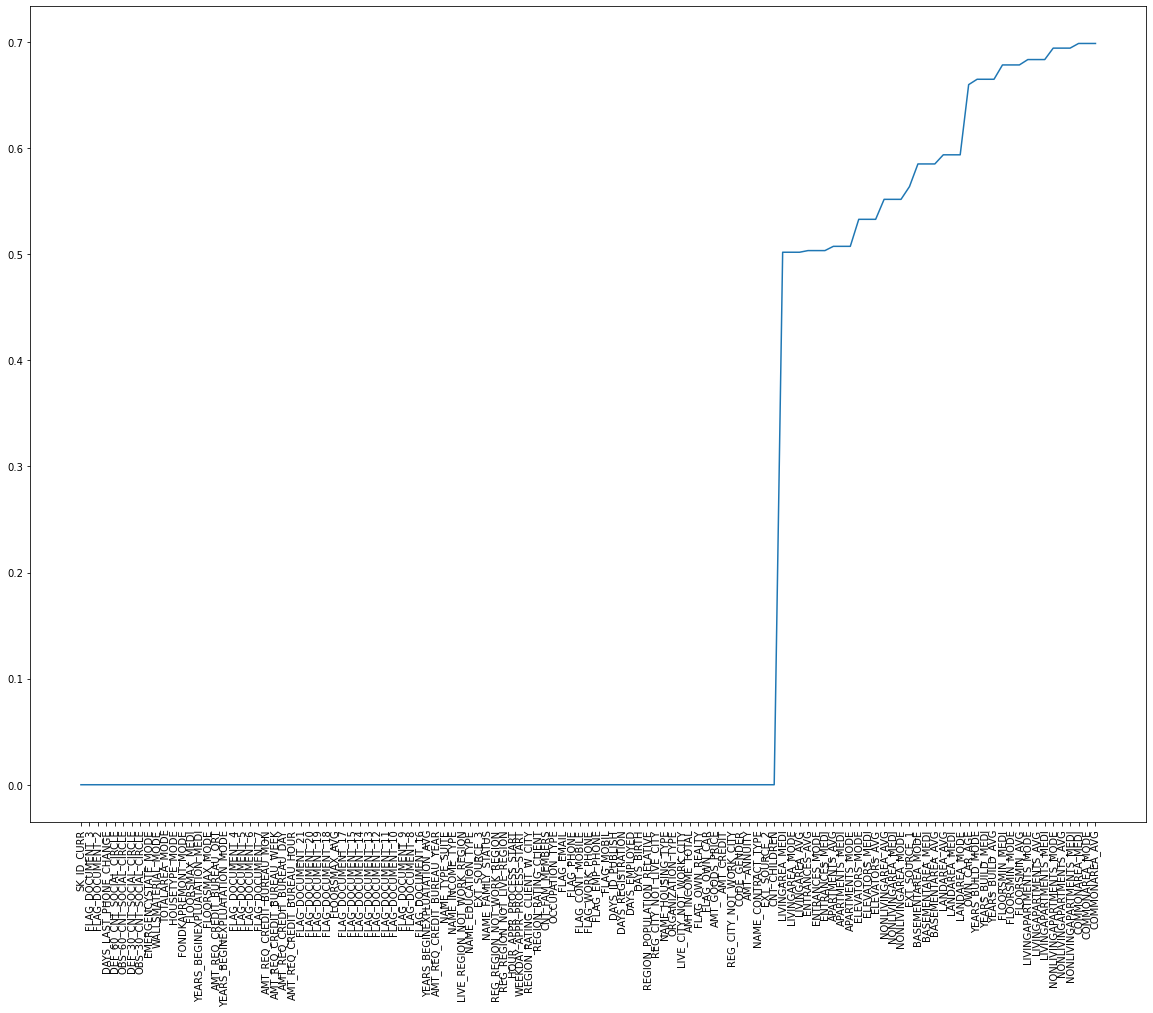

In [76]:
missing_value_train2 = df_train.isnull().mean()
plt.subplots(figsize=(20,15))
plt.xticks(rotation=90)
plt.plot(missing_value_train2.sort_values())

in this part, we will transform the features of more than 50% of missing data and into a labeled column 
if not nan value then take 0 
if nan value then take 1

In [77]:

nan_values = df_train.isnull().sum()
pourcentage= pd.DataFrame(np.array(nan_values) ,index=nan_values.index)
pour=pourcentage.loc[pourcentage[0]>0.5]
a=df_train[pour.index]
a[~isnan(a)] = 0
# mark all nan as 1
a[isnan(a)] = 1
df_train[pour.index]=a

<ipython-input-77-4db6df6cca03>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[~isnan(a)] = 0
/home/marwen/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3215: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
<ipython-input-77-4db6df6cca03>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

as we see in next plot there's no nan value left

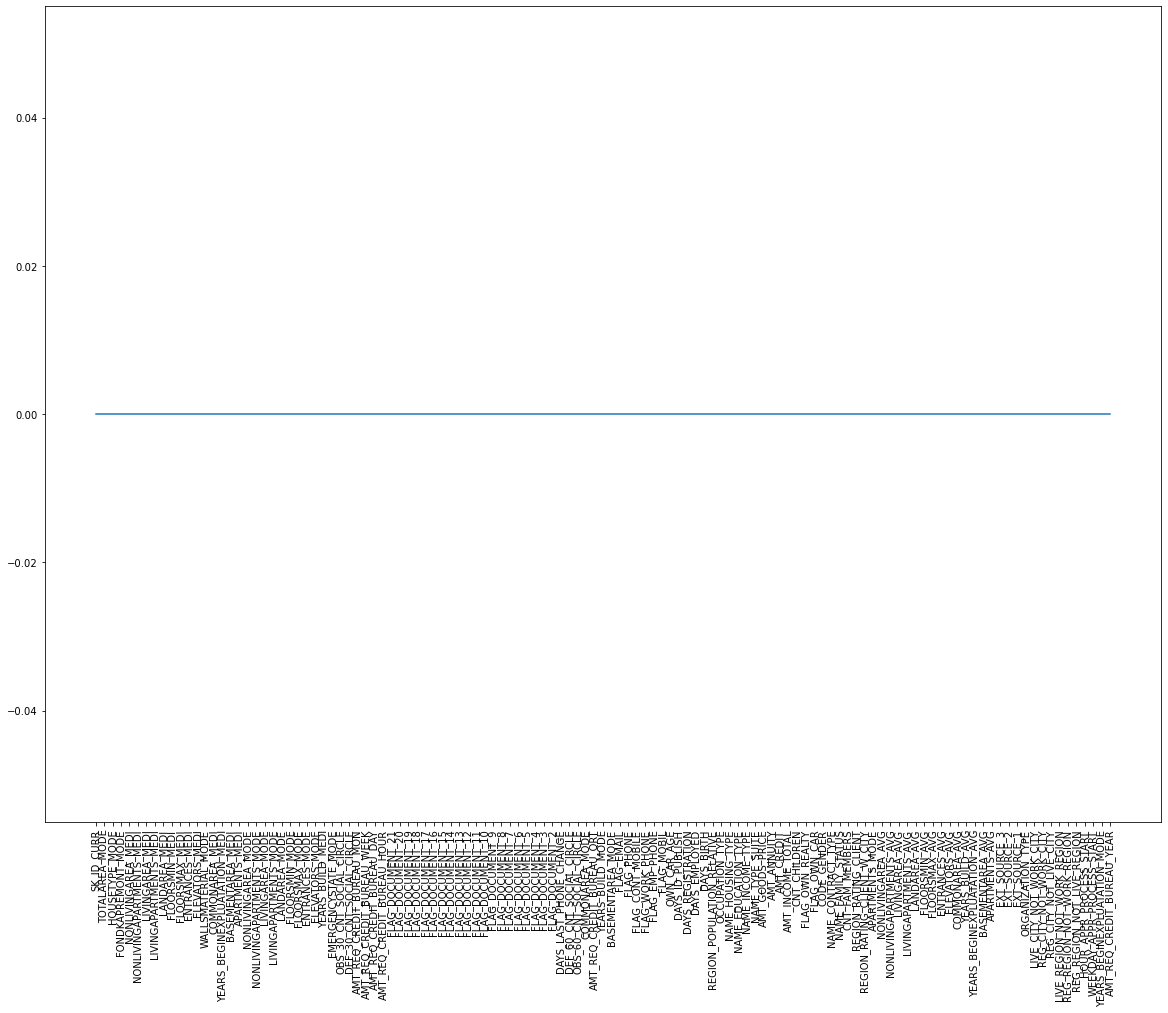

In [78]:
missing_value_train3 = df_train.isnull().mean()
plt.subplots(figsize=(20,15))
plt.xticks(rotation=90)
plt.plot(missing_value_train3.sort_values())

Now we will label encoding every categorical features in the data

In [79]:
label_encoders = {}
for col in list(df_train.columns):
    if df_train[col].dtype == 'object':
        label_encoders[col] = LabelEncoder()
        df_train[col]=label_encoders[col].fit_transform(df_train[col])
        df_test[col]=label_encoders[col].transform(df_test[col])

In [80]:
df_train.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

In [81]:
a['TARGET']=train['TARGET']

<ipython-input-81-758a64687fb7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['TARGET']=train['TARGET']


In [82]:
a

,OWN_CAR_AGE,EXT_SOURCE_1,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMIN_AVG,LANDAREA_AVG,...,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TARGET
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
307507,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
307508,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
307509,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1


In [83]:
# get correlation matrix 
corrolation=a.corr()
corrolation

,OWN_CAR_AGE,EXT_SOURCE_1,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMIN_AVG,LANDAREA_AVG,...,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TARGET
OWN_CAR_AGE,1.000000,0.045920,-0.032045,-0.026163,-0.017572,-0.015068,-0.026540,-0.032912,-0.016219,-0.028871,...,-0.015068,-0.026540,-0.032912,-0.016219,-0.028871,-0.015630,-0.032988,-0.014194,-0.025267,0.021841
EXT_SOURCE_1,0.045920,1.000000,0.038879,0.042260,0.039504,0.038829,0.038990,0.040701,0.039809,0.039959,...,0.038829,0.038990,0.040701,0.039809,0.039959,0.039458,0.039946,0.039137,0.038140,0.018641
APARTMENTS_AVG,-0.032045,0.038879,1.000000,0.837753,0.706118,0.659789,0.924016,0.960503,0.687961,0.823466,...,0.659789,0.924016,0.960503,0.687961,0.823466,0.683329,0.934788,0.670790,0.894478,0.040266
BASEMENTAREA_AVG,-0.026163,0.042260,0.837753,1.000000,0.776638,0.746792,0.853312,0.843455,0.761455,0.861864,...,0.746792,0.853312,0.843455,0.761455,0.861864,0.756031,0.832559,0.746850,0.865329,0.036619
YEARS_BUILD_AVG,-0.017572,0.039504,0.706118,0.776638,1.000000,0.906573,0.736926,0.711360,0.953324,0.758223,...,0.906573,0.736926,0.711360,0.953324,0.758223,0.936403,0.703409,0.917868,0.744372,0.031435
COMMONAREA_AVG,-0.015068,0.038829,0.659789,0.746792,0.906573,1.000000,0.692634,0.660235,0.911239,0.731342,...,1.000000,0.692634,0.660235,0.911239,0.731342,0.928458,0.658111,0.925983,0.715470,0.028026
ELEVATORS_AVG,-0.026540,0.038990,0.924016,0.853312,0.736926,0.692634,1.000000,0.928486,0.723273,0.831589,...,0.692634,1.000000,0.928486,0.723273,0.831589,0.714786,0.900765,0.701809,0.904721,0.040299
ENTRANCES_AVG,-0.032912,0.040701,0.960503,0.843455,0.711360,0.660235,0.928486,1.000000,0.691585,0.827011,...,0.660235,0.928486,1.000000,0.691585,0.827011,0.683406,0.945228,0.667019,0.898523,0.040872
FLOORSMIN_AVG,-0.016219,0.039809,0.687961,0.761455,0.953324,0.911239,0.723273,0.691585,1.000000,0.743227,...,0.911239,0.723273,0.691585,1.000000,0.743227,0.940838,0.683306,0.927862,0.731412,0.029765
LANDAREA_AVG,-0.028871,0.039959,0.823466,0.861864,0.758223,0.731342,0.831589,0.827011,0.743227,1.000000,...,0.731342,0.831589,0.827011,0.743227,1.000000,0.741722,0.818916,0.730936,0.851730,0.033146


<AxesSubplot:>

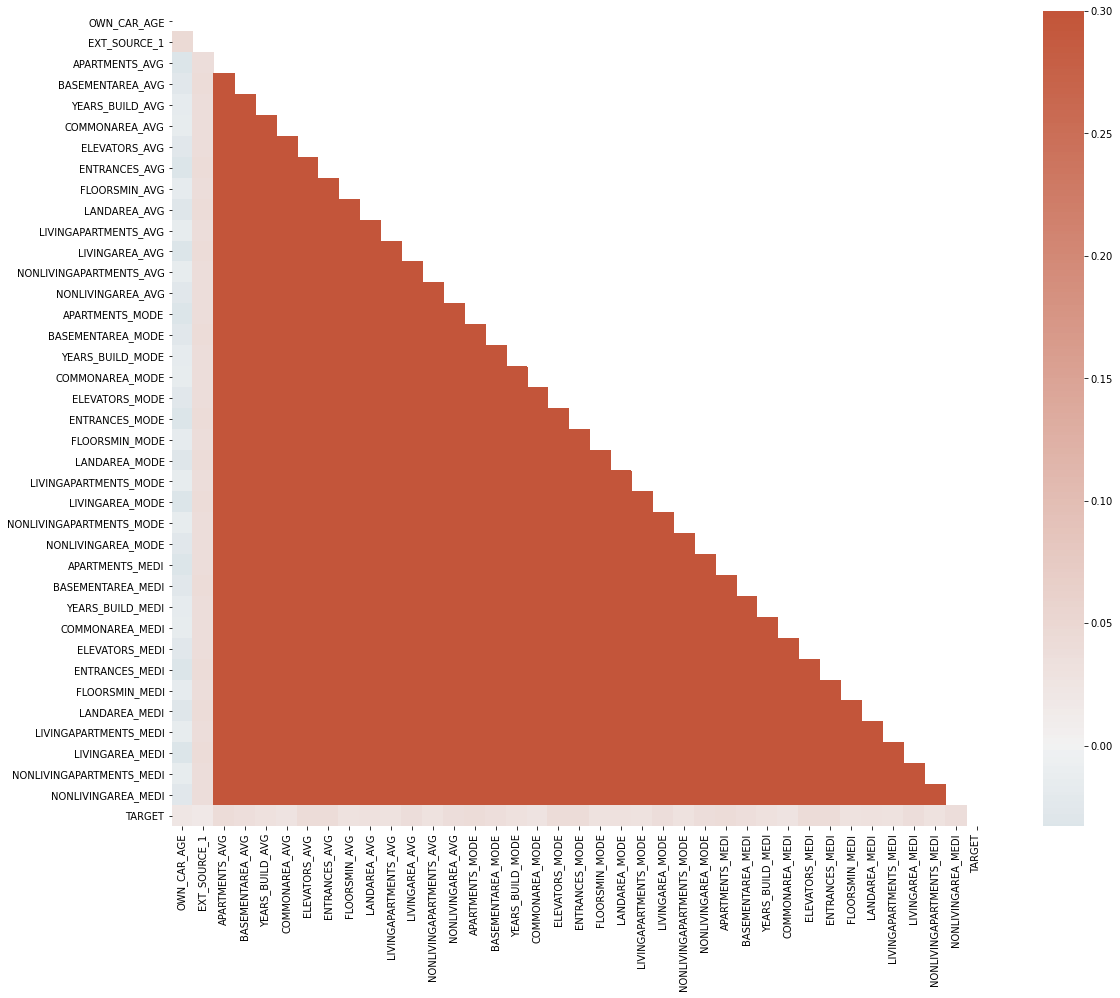

In [84]:
corrolation= a.corr()
mask = np.triu(np.ones_like(corrolation, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.subplots(figsize=(20,15))

sns.heatmap(corrolation, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True)

After transforming the columns of more than 50% of nan values into  binary columns turns out there no correlation between these feature and the target so we will delete them

In [85]:
df_train.drop(pour.index,axis=1,inplace=True)
df_test.drop(pour.index,axis=1,inplace=True)

In [86]:
df_train['TARGET']=train['TARGET']
target_coo = df_train.corr()['TARGET']
target_coo

SK_ID_CURR                   -0.002108
NAME_CONTRACT_TYPE           -0.030896
CODE_GENDER                   0.054692
FLAG_OWN_CAR                 -0.021851
FLAG_OWN_REALTY              -0.006148
                                ...   
AMT_REQ_CREDIT_BUREAU_WEEK    0.000718
AMT_REQ_CREDIT_BUREAU_MON    -0.011356
AMT_REQ_CREDIT_BUREAU_QRT    -0.001842
AMT_REQ_CREDIT_BUREAU_YEAR    0.018160
TARGET                        1.000000
Name: TARGET, Length: 84, dtype: float64

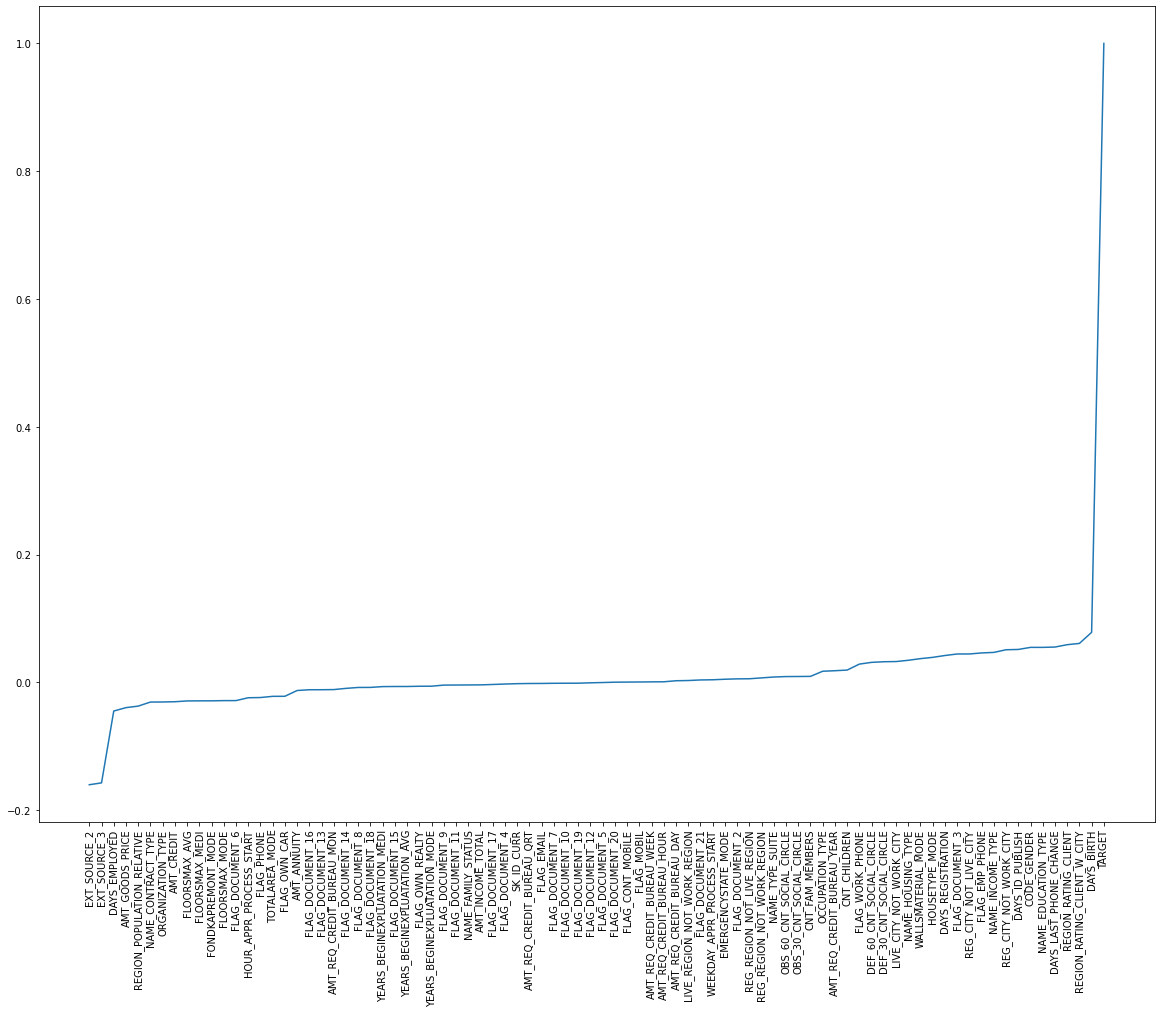

In [87]:
plt.subplots(figsize=(20,15))
plt.xticks(rotation=90)
plt.plot(target_coo.sort_values())



After exploring the course of correlation with target we will drop the columns that have less 0.05 correlation with target 

In [88]:
feauture_todrop= target_coo[(target_coo>-0.05)& (target_coo<0.05)]
df_train.drop(feauture_todrop.index,axis=1,inplace=True)
df_test.drop(feauture_todrop.index,axis=1,inplace=True)

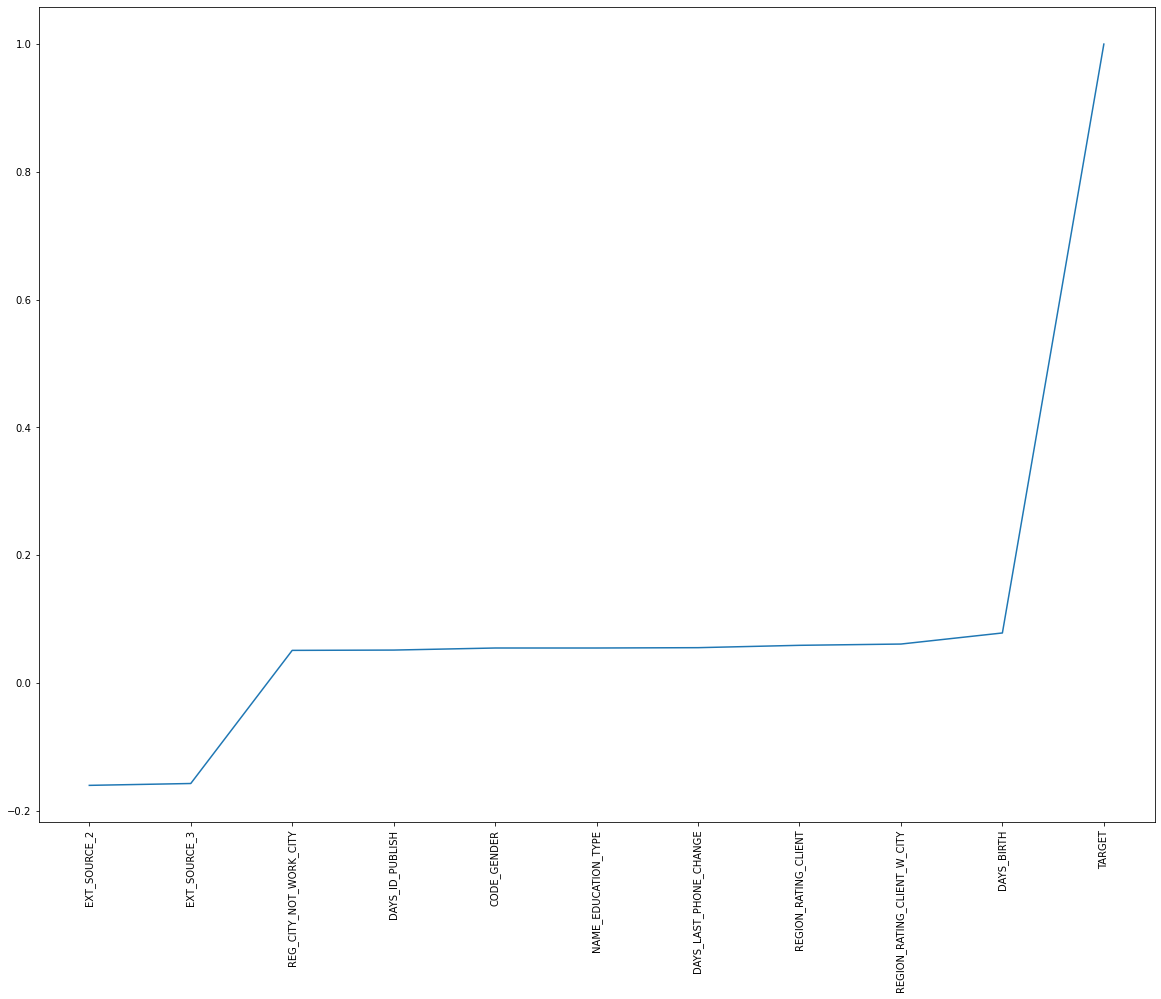

In [89]:
after_drop = df_train.corr()['TARGET']
plt.subplots(figsize=(20,15))
plt.xticks(rotation=90)
plt.plot(after_drop.sort_values())


<AxesSubplot:>

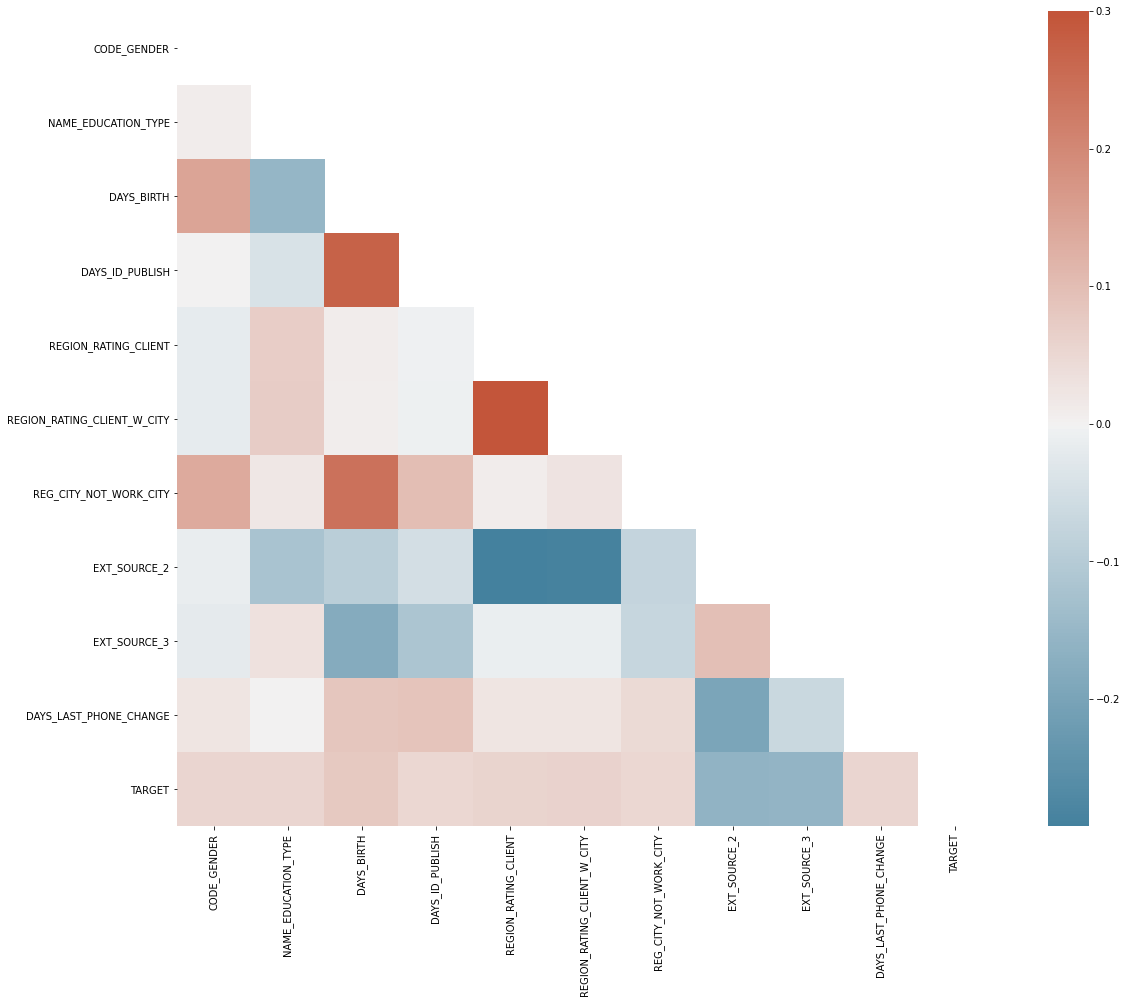

In [90]:
mask = np.triu(np.ones_like(df_train.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.subplots(figsize=(20,15))

sns.heatmap(df_train.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True)

In [103]:
df_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<BarContainer object of 2 artists>

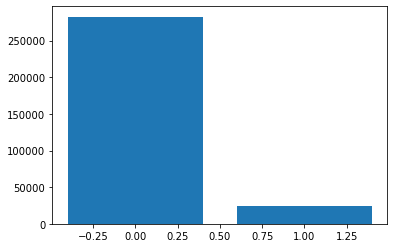

In [100]:
plt.bar((0,1),height=df_train['TARGET'].value_counts())

In [130]:
X=df_train.drop(['TARGET'],axis=1).values
y= df_train.TARGET.values

In [131]:
X.shape

(307511, 10)

In [132]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X,y = rus.fit_resample(X,y)

In [133]:
X.shape

(49650, 10)

In [104]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X,y = oversample.fit_resample(X,y)

In [135]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [136]:
X_train , X_test ,y_train, y_test= train_test_split(X,y,test_size=0.3)


In [137]:
# Spot Check Algorithms
models = []
models.append(('RFC', RandomForestClassifier()))
models.append(('KNC', KNeighborsClassifier( )))
models.append(('DTC', DecisionTreeClassifier( )))
models.append(('GBC', GradientBoostingClassifier( )))


In [138]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

RFC: 0.654007 (0.006086)
KNC: 0.619537 (0.007703)
DTC: 0.576752 (0.004134)
GBC: 0.670753 (0.004712)


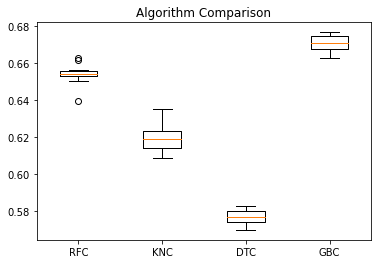

In [140]:
# Compare Algorithms
from matplotlib import pyplot

pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [141]:

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
pred= gbc.predict(X_test)

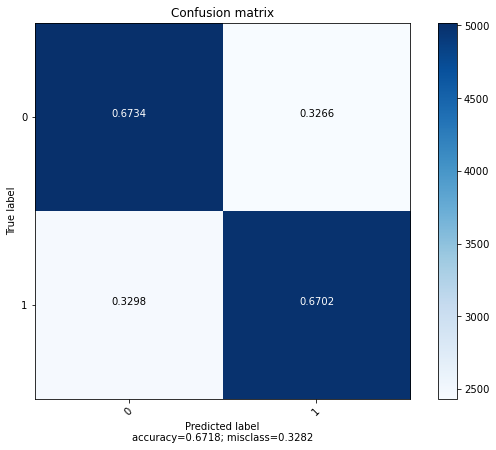

In [142]:
cm=confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,[0,1])


In [143]:
t=scaler.transform(df_test)

In [145]:
test_predict =gbc.predict(t)

In [146]:
test_predict

array([0, 1, 0, ..., 1, 0, 1])

In [147]:
test['target']= test_predict

<BarContainer object of 2 artists>

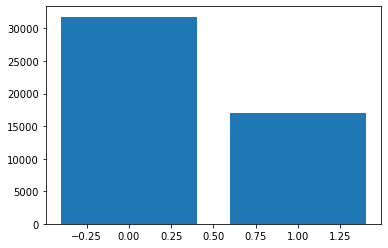

In [149]:
plt.bar((0,1),test['target'].value_counts())

what I have learned :
- imbalanced data may cause the model to overfit on one target and ignore other 
- balancing the data by oversampling cause overfit on the target generated 
-the best idea is to undersampling the higher target 